In [2]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 151MB/s]
100% 1.06G/1.06G [00:07<00:00, 150MB/s]


In [4]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

['cat.5818.jpg',
 'cat.5374.jpg',
 'cat.7840.jpg',
 'cat.12341.jpg',
 'cat.9824.jpg',
 'cat.3101.jpg',
 'cat.4825.jpg',
 'cat.2390.jpg',
 'cat.2151.jpg',
 'cat.2276.jpg',
 'cat.10210.jpg',
 'cat.10162.jpg',
 'cat.10463.jpg',
 'cat.9762.jpg',
 'cat.12013.jpg',
 'cat.10632.jpg',
 'cat.2716.jpg',
 'cat.2517.jpg',
 'cat.542.jpg',
 'cat.1291.jpg',
 'cat.7263.jpg',
 'cat.2623.jpg',
 'cat.1432.jpg',
 'cat.10980.jpg',
 'cat.6910.jpg',
 'cat.9615.jpg',
 'cat.10327.jpg',
 'cat.5246.jpg',
 'cat.12395.jpg',
 'cat.2225.jpg',
 'cat.12460.jpg',
 'cat.3732.jpg',
 'cat.1885.jpg',
 'cat.8032.jpg',
 'cat.9804.jpg',
 'cat.3773.jpg',
 'cat.9655.jpg',
 'cat.4263.jpg',
 'cat.1665.jpg',
 'cat.1592.jpg',
 'cat.4250.jpg',
 'cat.4015.jpg',
 'cat.10662.jpg',
 'cat.7641.jpg',
 'cat.8016.jpg',
 'cat.3045.jpg',
 'cat.11576.jpg',
 'cat.2217.jpg',
 'cat.6535.jpg',
 'cat.6433.jpg',
 'cat.9660.jpg',
 'cat.3507.jpg',
 'cat.5571.jpg',
 'cat.10725.jpg',
 'cat.3672.jpg',
 'cat.3700.jpg',
 'cat.7919.jpg',
 'cat.6611.jpg',
 '

In [7]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):

    image_filenames = os.listdir(directory_path)

Found 20000 files belonging to 2 classes.


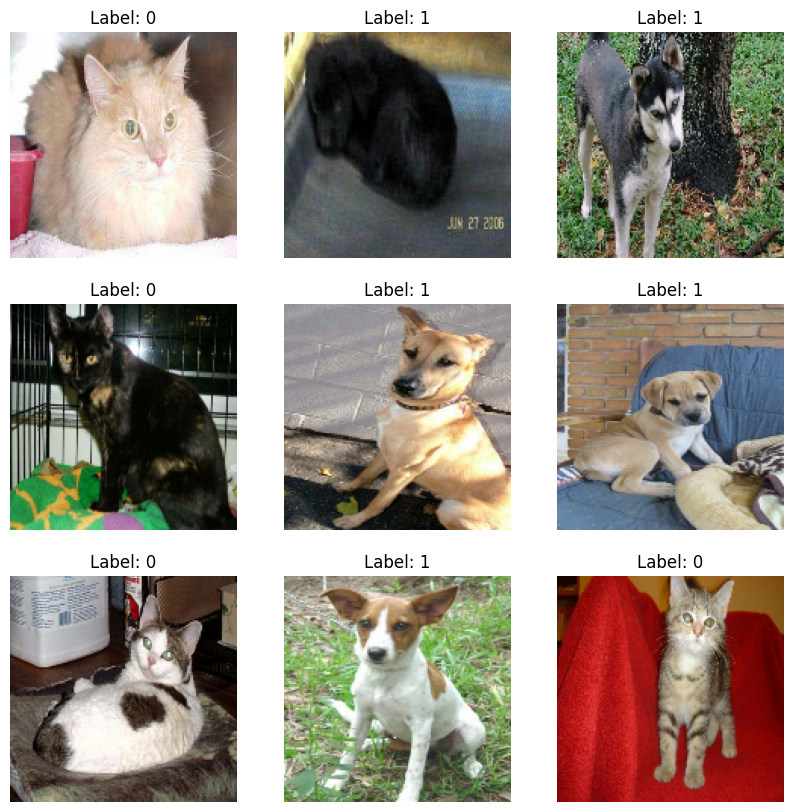

In [8]:


# Step 2: Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 3: Set the path to your image directory
# Replace 'path_to_images' with the directory containing your images
image_directory = "/content/train"

# Step 4: Load images using image_dataset_from_directory
dataset = tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels='inferred',        # Automatically infer labels from subfolder names
    label_mode='int',         # Labels are integers
    image_size=(150, 150),    # Resize images to 150x150
    batch_size=32,            # Number of images in each batch
    shuffle=True              # Shuffle images
)

# Step 5: Retrieve 9 images and their labels from the dataset
for images, labels in dataset.take(1):  # Take one batch
    plt.figure(figsize=(10, 10))        # Set figure size

    for i in range(9):  # Display first 9 images
        plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to uint8
        plt.title(f"Label: {labels[i]}")  # Display the label
        plt.axis("off")  # Remove axes

    plt.show()

Class 'cats': 10000 images
Class 'dogs': 10000 images


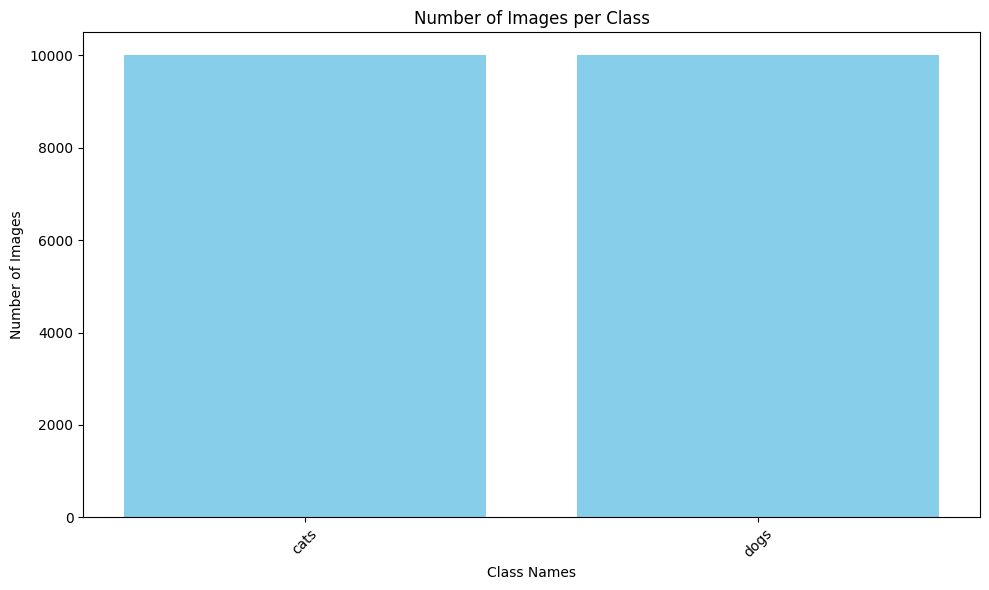

In [9]:
import os
import matplotlib.pyplot as plt

# Function to count images for each class
def count_images_per_class(directory_path):
    class_counts = {}  # Dictionary to store counts of images per class

    # Traverse each subfolder (class) in the directory
    for class_name in os.listdir(directory_path):
        class_path = os.path.join(directory_path, class_name)

        # Check if it's a directory (ignore files)
        if os.path.isdir(class_path):
            # Count only files in the directory
            image_count = len([f for f in os.listdir(class_path)
                               if os.path.isfile(os.path.join(class_path, f))])

            # Add to the dictionary
            class_counts[class_name] = image_count

    # Print the counts
    for class_name, count in class_counts.items():
        print(f"Class '{class_name}': {count} images")

    return class_counts

# Function to plot a bar graph
def plot_bar_graph(class_counts):
    # Extract class names and their image counts
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.title('Number of Images per Class')
    plt.xlabel('Class Names')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Path to the root directory containing class subfolders
root_directory = "/content/train"  # Replace with your path

# Run the functions
class_image_counts = count_images_per_class(root_directory)
plot_bar_graph(class_image_counts)

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Set the path to your dataset directory
dataset_directory = "/content/train"  # Replace with your path

# Step 2: Load images in batches using image_dataset_from_directory
batch_size = 32  # Number of images in each batch
img_height = 150  # Height to resize images
img_width = 150   # Width to resize images

# Create training and validation datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    validation_split=0.2,      # Use 20% of data for validation
    subset="training",         # Subset: Training data
    seed=123,                  # Ensure reproducibility
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size      # Number of images per batch
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    validation_split=0.2,      # Use 20% of data for validation
    subset="validation",       # Subset: Validation data
    seed=123,                  # Ensure reproducibility
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size      # Number of images per batch
)

# Step 3: Normalize the pixel values (optional)
normalization_layer = tf.keras.layers.Rescaling(1./255)  # Scale pixel values to [0, 1]

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [5]:
model =Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

In [7]:
epochs = 5
history = model.fit( train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.5785 - loss: 0.6671 - val_accuracy: 0.7455 - val_loss: 0.5329
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 105ms/step - accuracy: 0.7370 - loss: 0.5294 - val_accuracy: 0.7665 - val_loss: 0.4768
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.7964 - loss: 0.4420 - val_accuracy: 0.8303 - val_loss: 0.3790
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.8469 - loss: 0.3543 - val_accuracy: 0.8485 - val_loss: 0.3443
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 72ms/step - accuracy: 0.8850 - loss: 0.2807 - val_accuracy: 0.8430 - val_loss: 0.3818


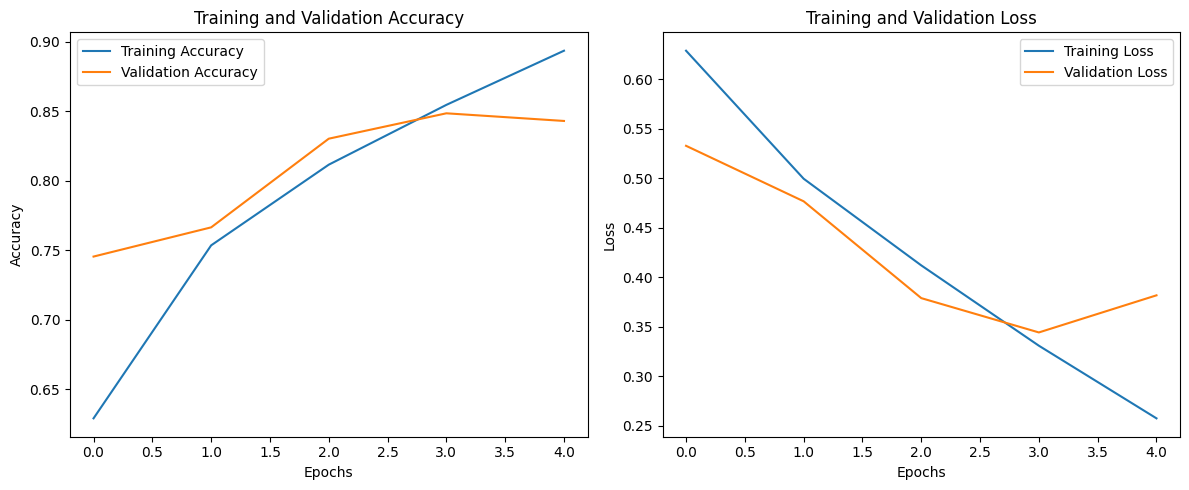

In [8]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss graphs
def plot_training_history(history):
    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_training_history(history)

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Paste the image directory path here
img_path = '/content/images.jpeg'  # Replace this with your image's directory path

# Step 2: Preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to your model's input size
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image if the model was trained with normalized data

# Step 3: Load your trained model
# Uncomment the below line and replace 'path_to_your_model' with your model's path
# model = tf.keras.models.load_model('path_to_your_model')

# Step 4: Make a prediction
predictions = model.predict(img_array)
print("Prediction probabilities:", predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction probabilities: [[0.87667173]]
